# Predicting the Batting Average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ODI Bowling Average

In [2]:
df = pd.read_csv('Data/Final/odi_bowl_processed_data.csv')
df.head()

,Bowling Style,Innings_T20_bowling,Innings_Test_bowling,Balls_Test,Runs_T20_bowling,Runs_Test_bowling,Wickets_T20,Wickets_Test,BBI_T20,BBI_Test,...,5_Test,10_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,Bowling Hand,AgeStart_Test,AgeStart_T20
0,1,33,12,1385,965,819,30,33,0.083333,0.052174,...,4,0,33,6,6,2018,2012,1,24.819178,18.819178
1,1,10,40,5103,240,2715,16,76,0.125000,0.070423,...,1,0,10,22,7,2008,2010,1,25.679452,27.679452
2,1,12,2,420,289,277,4,2,0.071429,0.011765,...,0,0,12,2,9,2020,2019,0,24.506849,23.506849
3,0,2,69,7630,42,3919,2,123,0.105263,0.187500,...,3,1,2,36,8,2001,2005,1,24.038356,28.038356
4,0,41,32,3057,1016,1870,53,70,0.571429,0.107143,...,4,0,42,19,8,2019,2019,1,25.701370,25.701370


In [3]:
X = df.drop('Ave_ODI_bowling', axis = 1)

In [4]:
y = df['Ave_ODI_bowling']

##### Dropping with correlation

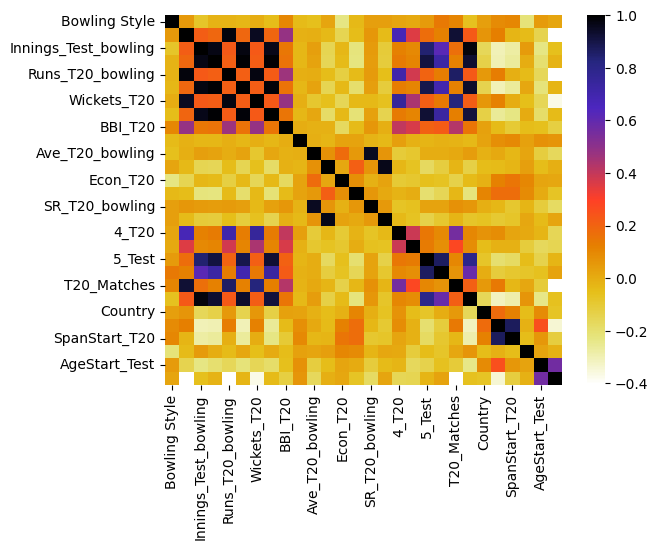

In [5]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [6]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [7]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [8]:
highly_correlated

['Balls_Test',
 'Runs_T20_bowling',
 'Runs_Test_bowling',
 'Wickets_T20',
 'Wickets_Test',
 'SR_T20_bowling',
 'SR_Test_bowling',
 '5_Test',
 '10_Test',
 'T20_Matches',
 'Test_Matches',
 'SpanStart_T20']

In [9]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [17]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=16, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1566.7728 - mae: 35.7463 - val_loss: 1446.2449 - val_mae: 35.8532 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1253.7451 - mae: 33.2658 - val_loss: 1384.7737 - val_mae: 35.0493 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1464.7506 - mae: 35.4020 - val_loss: 1299.5732 - val_mae: 33.8920 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1238.6522 - mae: 32.5997 - val_loss: 1182.1448 - val_mae: 32.2085 - learning_rate: 0.0010
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1109.2389 - mae: 30.6667 - val_loss: 1028.5580 - val_mae: 29.8213 - learning_rate: 0.0010
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 982.8010 - mae: 28.1528 - val_loss: 848.5071 - val_mae: 26.6789 - learning_rate: 0.0010
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 756.0027 - mae: 23.9957 - val_loss: 656.8855 - va

In [18]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192.5389 - mae: 10.0603
Test MAE: 10.422832489013672


In [19]:
# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test MSE: 196.58341318751815
Test R2 Score: -0.22600347849126567


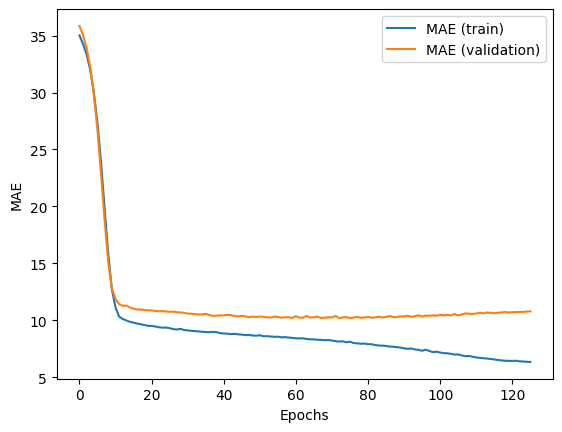

In [20]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Test Bowling Average

In [21]:
df = pd.read_csv('Data/Final/test_bowl_processed_data.csv')
df.head()

,Bowling Style,Innings_ODI_bowling,Innings_T20_bowling,Balls_ODI,Runs_ODI_bowling,Runs_T20_bowling,Wickets_ODI,Wickets_T20,BBI_ODI,BBI_T20,...,5_ODI,5_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,Bowling Hand,AgeStart_ODI,AgeStart_T20
0,1,38,33,1995,1715,965,58,30,0.206897,0.083333,...,2,0,40,33,7,2012,2012,1,18.819178,18.819178
1,1,34,10,1917,1511,240,64,16,0.125000,0.125000,...,2,0,36,10,2,2003,2010,1,20.679452,27.679452
2,1,2,12,102,80,289,1,4,0.034483,0.071429,...,0,0,2,12,6,2019,2019,0,23.506849,23.506849
3,0,76,2,3801,2935,42,106,2,0.111111,0.105263,...,1,0,79,2,0,2001,2005,1,24.038356,28.038356
4,0,21,41,1006,982,1016,36,53,0.078431,0.571429,...,0,0,22,42,0,2019,2019,1,25.701370,25.701370


In [22]:
X = df.drop('Ave_Test_bowling', axis = 1)

In [23]:
y = df['Ave_Test_bowling']

##### Dropping with correlation

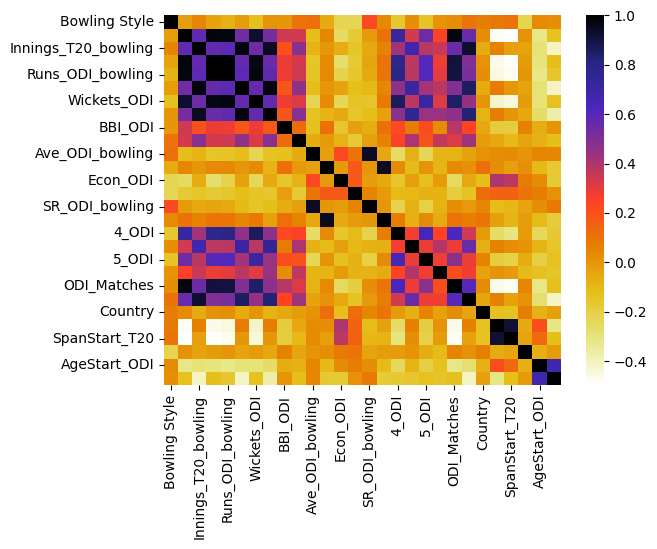

In [24]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [25]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [26]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [27]:
highly_correlated

['Balls_ODI',
 'Runs_ODI_bowling',
 'Runs_T20_bowling',
 'Wickets_ODI',
 'Wickets_T20',
 'SR_ODI_bowling',
 'SR_T20_bowling',
 '4_ODI',
 'ODI_Matches',
 'T20_Matches',
 'SpanStart_T20']

In [28]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [33]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [34]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=16, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2617.7866 - mae: 41.2066 - val_loss: 1657.9484 - val_mae: 34.6993 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2788.6792 - mae: 41.6933 - val_loss: 1542.6257 - val_mae: 33.3629 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2456.0193 - mae: 38.8040 - val_loss: 1397.0438 - val_mae: 31.5541 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2247.5225 - mae: 35.4384 - val_loss: 1210.4945 - val_mae: 28.9734 - learning_rate: 0.0010
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2200.1270 - mae: 34.5929 - val_loss: 999.1699 - val_mae: 25.5171 - learning_rate: 0.0010
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2089.5317 - mae: 30.2042 - val_loss: 799.6218 - val_mae: 21.6913 - learning_rate: 0.0010
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1376.1271 - mae: 25.8360 - val_loss: 654.0792 - v

In [35]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 597.9280 - mae: 17.1601
Test MAE: 17.501333236694336


In [36]:
# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test MSE: 604.636313674168
Test R2 Score: -0.26278625947711887


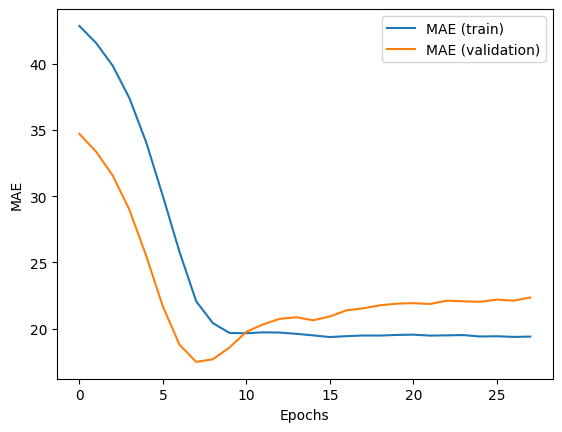

In [37]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## T20 Bowling Average

In [38]:
df = pd.read_csv('Data/Final/t20_bowl_processed_data.csv')
df.head()

,Bowling Style,Innings_ODI_bowling,Innings_Test_bowling,Balls_ODI,Balls_Test,Runs_ODI_bowling,Runs_Test_bowling,Wickets_ODI,Wickets_Test,BBI_ODI,...,5_Test,10_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,Bowling Hand,AgeStart_ODI,AgeStart_Test
0,0,38,12,1995,1385,1715,819,58,33,0.206897,...,4,0,40,6,7,2012,2018,1,18.819178,24.819178
1,0,34,40,1917,5103,1511,2715,64,76,0.125000,...,1,0,36,22,4,2003,2008,1,20.679452,25.679452
2,0,2,2,102,420,80,277,1,2,0.034483,...,0,0,2,2,11,2019,2020,0,23.506849,24.506849
3,1,76,69,3801,7630,2935,3919,106,123,0.111111,...,3,1,79,36,2,2001,2001,1,24.038356,24.038356
4,1,21,32,1006,3057,982,1870,36,70,0.078431,...,4,0,22,19,2,2019,2019,1,25.701370,25.701370


In [39]:
X = df.drop('Ave_T20_bowling', axis = 1)

In [40]:
y = df['Ave_T20_bowling']

##### Dropping with correlation

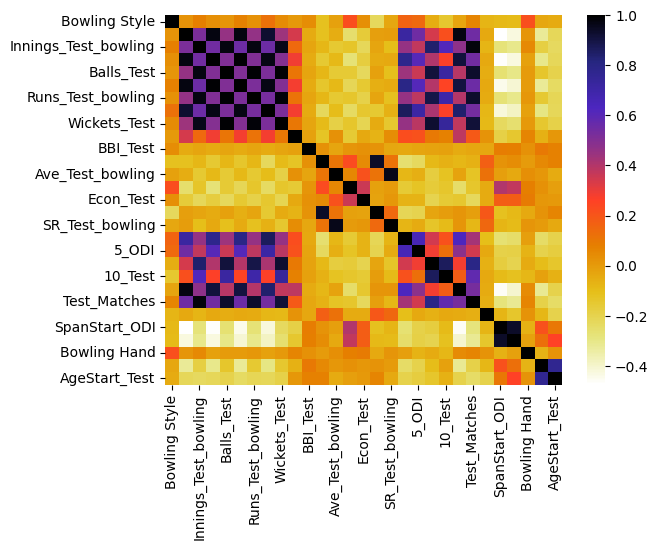

In [41]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [42]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [43]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [44]:
highly_correlated

['Balls_ODI',
 'Balls_Test',
 'Runs_ODI_bowling',
 'Runs_Test_bowling',
 'Wickets_ODI',
 'Wickets_Test',
 'SR_ODI_bowling',
 'SR_Test_bowling',
 '4_ODI',
 '5_Test',
 '10_Test',
 'ODI_Matches',
 'Test_Matches',
 'SpanStart_Test']

In [45]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [50]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [51]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=16, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 884.1462 - mae: 26.0364 - val_loss: 820.1851 - val_mae: 24.7847 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 816.0301 - mae: 24.8491 - val_loss: 779.5857 - val_mae: 24.0564 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 828.2386 - mae: 25.2160 - val_loss: 717.0240 - val_mae: 22.8347 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 697.5715 - mae: 23.2554 - val_loss: 630.1201 - val_mae: 21.0425 - learning_rate: 0.0010
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 548.8793 - mae: 20.1358 - val_loss: 531.4879 - val_mae: 18.7510 - learning_rate: 0.0010
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 465.4175 - mae: 18.1161 - val_loss: 444.6572 - val_mae: 16.3745 - learning_rate: 0.0010
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 400.4506 - mae: 16.1316 - val_loss: 395.7484 - val_mae: 14.4109 - learn

In [52]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390.1273 - mae: 13.5029
Test MAE: 13.610860824584961


In [53]:
# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x313b79c60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test MSE: 388.17034222001126
Test R2 Score: -0.8520624558274734


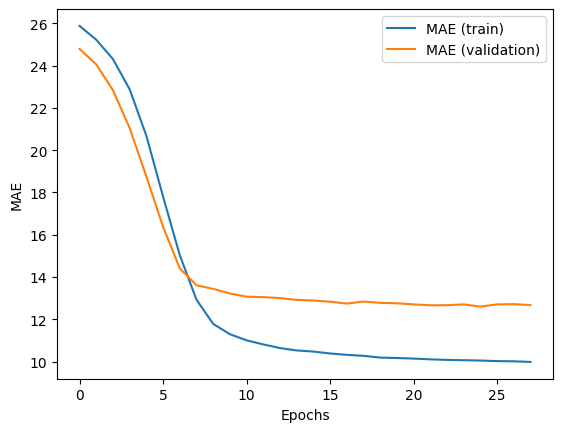

In [54]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Final MSE and R2

| Match Type | MSE                     | R²                   |
|------------|------------------------|------------------------|
| ODI        |   196.583 |   -0.2260|
| Test       |   604.636|    -0.2627|
| T20        |   388.170 |   -0.8520|